# Audio Classification
dataset=https://urbansounddataset.weebly.com/urbansound8k.html

## Librosa library
librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.

In [1]:
!pip install librosa

     -------------------------------------- 214.3/214.3 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 377.0/377.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 56.3/56.3 kB ? eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 5.2 MB/s eta 0:00:00
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23703 sha256=6ecd61b67265c555a196d6f9257a62981721f040623ccb8486c212c1ecff4aec
  Stored in directory: c:\users\yashs\appdata\local\pip\cache\wheels\e4\76\a4\cfb55573167a1f5bde7d7a348e95e509c64b2c3e8f921932c3
Successfully built audioread


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

### change directory to where data is

In [17]:
!dir

 Volume in drive D is DATA
 Volume Serial Number is 9090-78ED

 Directory of D:\education\machine learning\projects\AUDIO

01-02-2023  18:04    <DIR>          .
17-11-2022  16:00    <DIR>          ..
18-11-2022  21:38         3,831,662 arrays.xlsx
02-02-2023  09:48    <DIR>          UrbanSound8K
17-11-2022  20:58     6,023,741,708 UrbanSound8K.tar.gz
               2 File(s)  6,027,573,370 bytes
               3 Dir(s)  866,423,173,120 bytes free


In [18]:
cd D:/education/machine learning/projects/AUDIO

D:\education\machine learning\projects\AUDIO


In [19]:
!dir

 Volume in drive D is DATA
 Volume Serial Number is 9090-78ED

 Directory of D:\education\machine learning\projects\AUDIO

01-02-2023  18:04    <DIR>          .
17-11-2022  16:00    <DIR>          ..
18-11-2022  21:38         3,831,662 arrays.xlsx
02-02-2023  09:48    <DIR>          UrbanSound8K
17-11-2022  20:58     6,023,741,708 UrbanSound8K.tar.gz
               2 File(s)  6,027,573,370 bytes
               3 Dir(s)  866,423,173,120 bytes free


## visualise a wav file 


In [46]:
filename='UrbanSound8K/gunshot.wav'

In [47]:
#importing librosa for visualisation
import IPython.display as ipd
import librosa
import librosa.display

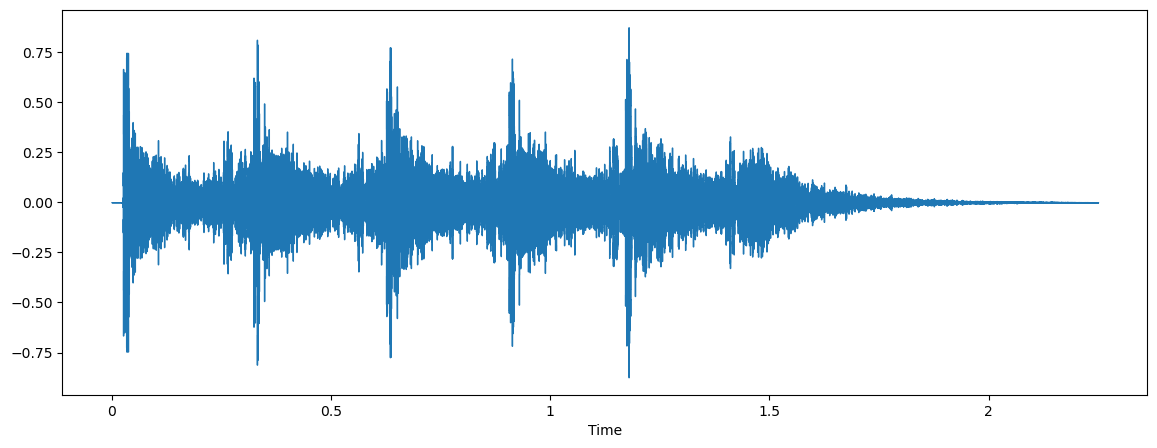

In [49]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
#The sampling rate is nothing but samples taken per second, and by default, 
#librosa samples the file at a sampling rate of 22050; you can override it by your desired sampling rate. 

In [ ]:
#librosa normalises the data from two channels(mono and stereo)

In [33]:
#Sample rates are usually measured per second, using kilohertz (kHz) or cycles per second. 
#CDs are usually recorded at 44.1kHz - which means that every second, 44,100 samples were taken. 
sample_rate

22050

In [52]:
data#single channel data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0969747e-05,
       2.2333768e-05, 0.0000000e+00], dtype=float32)

In [41]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [50]:
wave_sample_rate #actual sample rate

44100

In [51]:
 wave_audio #2 channel data

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

## exploring dataset

In [54]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [55]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [125]:
metadata['class']

0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: class, Length: 8732, dtype: object

In [56]:
# data set is kinda balances but few classes have low examples

In [59]:
#different example
audio_file_path='UrbanSound8K/audio/fold3/6988-5-0-5.wav'#tractor
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [60]:
librosa_audio_data

array([ 0.10824239,  0.18293792,  0.19007891, ..., -0.24995404,
       -0.25091743, -0.2663962 ], dtype=float32)

In [64]:
### Lets plot the librosa audio data

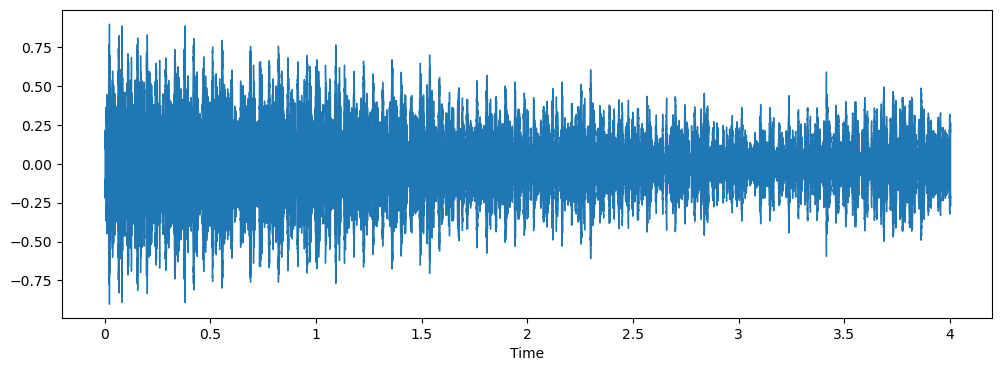

In [65]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(librosa_audio_data,sr=librosa_sample_rate)
ipd.Audio(audio_file_path)

In [66]:
#if plot via scipy

In [67]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [68]:
wave_audio

array([[  4026,   5474],
       [  4446,   5891],
       [  4906,   6365],
       ...,
       [ -6663, -10046],
       [ -6833,  -9886],
       [ -6952,  -9728]], dtype=int16)

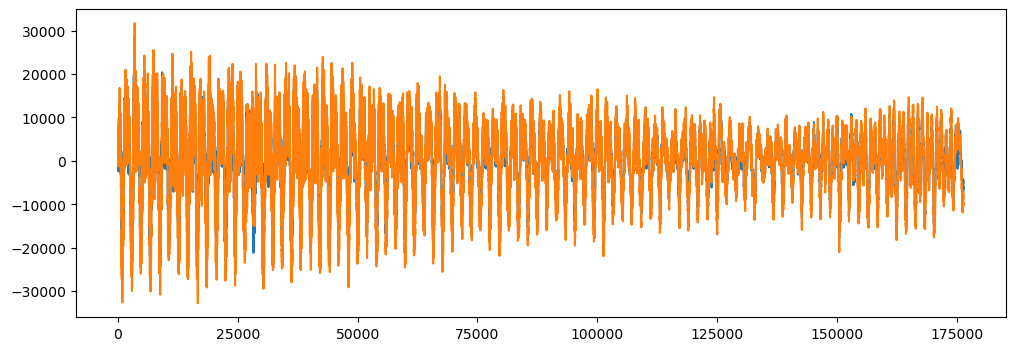

In [71]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [72]:
#data is in two channels and librosa converts it into one channel whereas scipy does not hence we get this kind of respresentation

## converting audio imformation into coefficients

In [77]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=44)
print(mfccs.shape)

(44, 173)


In [78]:
mfccs#coefficient for single file

array([[-1.1972715e+02, -8.1168121e+01, -7.9645660e+01, ...,
        -2.1983217e+02, -1.9641763e+02, -1.6070718e+02],
       [ 1.4208221e+02,  1.5726111e+02,  1.6426918e+02, ...,
         1.9048828e+02,  1.6159810e+02,  1.1665289e+02],
       [-3.0975002e+01, -4.1772179e+01, -4.6695946e+01, ...,
        -1.0123459e+01,  7.7333169e+00,  2.1290808e+01],
       ...,
       [ 2.7683523e+00,  3.2076745e+00,  4.1050930e+00, ...,
        -2.1561513e+00, -4.6866834e-02,  5.6525385e-01],
       [ 1.6219559e+00,  2.4304054e+00,  6.0713711e+00, ...,
        -1.4658583e+00, -8.9357054e-01,  9.3727708e-02],
       [ 6.2242718e+00,  4.3022332e+00,  4.3133650e+00, ...,
        -2.6435819e+00, -8.7951392e-01,  4.9159551e-01]], dtype=float32)

In [79]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [80]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

tqdm is basically a progress bar

In [81]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [04:37, 13.93it/s]C:\Users\yashs\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [10:50, 12.58it/s]C:\Users\yashs\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8329it [10:50, 17.21it/s]C:\Users\yashs\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [11:19, 12.84it/s]


In [82]:
extracted_features

[[array([-217.35526   ,   70.22338   , -130.38527   ,  -53.282898  ,
          -21.19913   ,  -22.677622  ,  -10.85597   ,   18.294254  ,
            6.652703  ,   14.324025  ,  -12.167682  ,    2.2768366 ,
          -17.779188  ,   10.388951  ,   -6.5828357 ,   -0.69445676,
          -18.336023  ,    1.9942534 ,   -5.143332  ,    8.3024    ,
          -12.645056  ,   -6.529732  ,    4.6176677 ,   -2.1799166 ,
           -6.6628237 ,    0.35971048,   -3.9084098 ,    4.7756243 ,
           -6.384521  ,   -5.379818  ,    0.91597855,    6.9704933 ,
           -0.248668  ,    1.6782187 ,   -5.6111817 ,   -2.9643466 ,
            3.1490574 ,   -1.693053  ,   -0.6169836 ,    0.3860054 ],
        dtype=float32),
  'dog_bark'],
 [array([-4.2409818e+02,  1.0934077e+02, -5.2919525e+01,  6.0864750e+01,
          2.4529229e-01,  1.7347328e+01,  2.0955827e+00,  1.0712965e+01,
         -1.3986126e+00,  1.2310798e+01, -1.1208863e+01,  2.1075323e+01,
         -9.4902792e+00,  1.3526470e+01, -2.3910540

In [84]:
#converted the extracted features into table 
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [94]:
extracted_features_df.to_csv('MFCC_coefficients.csv')


In [86]:
#using google collab for faster training and processing

In [114]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [115]:
X[0]

array([-217.35526   ,   70.22338   , -130.38527   ,  -53.282898  ,
        -21.19913   ,  -22.677622  ,  -10.85597   ,   18.294254  ,
          6.652703  ,   14.324025  ,  -12.167682  ,    2.2768366 ,
        -17.779188  ,   10.388951  ,   -6.5828357 ,   -0.69445676,
        -18.336023  ,    1.9942534 ,   -5.143332  ,    8.3024    ,
        -12.645056  ,   -6.529732  ,    4.6176677 ,   -2.1799166 ,
         -6.6628237 ,    0.35971048,   -3.9084098 ,    4.7756243 ,
         -6.384521  ,   -5.379818  ,    0.91597855,    6.9704933 ,
         -0.248668  ,    1.6782187 ,   -5.6111817 ,   -2.9643466 ,
          3.1490574 ,   -1.693053  ,   -0.6169836 ,    0.3860054 ],
      dtype=float32)

In [116]:
X.shape

(8732, 40)

In [118]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [121]:
X

array([[-2.1735526e+02,  7.0223381e+01, -1.3038527e+02, ...,
        -1.6930530e+00, -6.1698359e-01,  3.8600540e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         5.3489321e-01, -5.4468733e-01,  4.4632089e-01],
       [-4.5879114e+02,  1.2138419e+02, -4.6520657e+01, ...,
         2.0768483e+00,  1.6962965e+00, -9.6140963e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941563e+01, ...,
        -3.0292380e+00,  2.7170298e+00,  7.6197419e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903442e+01, ...,
        -7.9082437e+00, -1.6414586e+00,  5.6668444e+00],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
         6.1386454e-01, -1.1449189e+01, -6.0105853e+00]], dtype=float32)

In [122]:
df = pd.DataFrame(X)

In [123]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-217.355255,70.223381,-130.385269,-53.282898,-21.199129,-22.677622,-10.855970,18.294254,6.652703,14.324025,...,0.915979,6.970493,-0.248668,1.678219,-5.611182,-2.964347,3.149057,-1.693053,-0.616984,0.386005
1,-424.098175,109.340767,-52.919525,60.864750,0.245292,17.347328,2.095583,10.712965,-1.398613,12.310798,...,-1.031447,1.868079,-0.960069,0.036977,-0.015435,-0.071756,-1.598885,0.534893,-0.544687,0.446321
2,-458.791138,121.384193,-46.520657,52.008121,-0.000384,23.783813,8.749806,9.052491,-0.636421,10.987134,...,0.984424,-1.243447,-4.046101,-2.161726,-1.494173,-1.784590,-1.424619,2.076848,1.696296,-0.961410
3,-413.899841,101.663727,-35.429451,53.036354,1.520217,14.886695,2.878706,7.631294,-2.215483,9.920996,...,-5.103359,1.192205,0.896591,0.998597,-2.278609,1.134797,-1.398987,-1.308791,-2.098211,-1.193339
4,-446.603516,113.685410,-52.402206,60.302044,2.779428,25.073837,2.803380,10.143700,3.034920,10.420083,...,-2.638711,-1.249170,-0.344982,1.779847,-2.061509,0.043404,-0.698911,2.079335,1.116136,0.043718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,-398.584503,135.534958,-50.725018,35.855907,-8.039597,15.109999,7.619319,16.819832,-5.080297,3.601191,...,-8.461614,2.560358,4.204066,2.918537,-0.076288,1.535927,-4.409472,-7.080214,-2.464464,4.035294
8728,-346.474213,86.348152,-45.168579,51.709873,-32.506092,-4.313032,18.822187,-0.500065,-14.026640,20.996353,...,4.175920,2.989778,0.199695,6.329091,4.560744,0.637593,-1.592893,2.627199,-2.163822,-2.886271
8729,-303.888245,111.359451,-45.941563,35.877018,-9.130412,12.614908,2.730064,9.983287,-7.045451,5.537089,...,-6.438552,0.037069,4.099027,6.523638,3.317523,1.906624,-3.719005,-3.029238,2.717030,7.619742
8730,-344.110077,125.450211,-54.903442,34.891148,-19.626827,7.352660,13.471235,9.143031,-8.673483,18.334299,...,-8.522343,2.401435,5.968165,5.917666,1.596667,2.846004,-4.340133,-7.908244,-1.641459,5.666844


In [124]:
df.to_csv('X_values.csv')